In [ ]:
# prompt: load data /content/go_surfing.csv

import pandas as pd
df = pd.read_csv('/content/go_surfing.csv')
print(df.head())


   weekend  small_waves  popular_location  good_weather  summer  morning_time  \
0        0            1                 0             0       0             1   
1        1            1                 0             1       0             1   
2        0            1                 0             0       0             1   
3        0            1                 1             1       0             0   
4        0            0                 0             0       0             0   

   wetsuit_needed  close_drive  go_surfing  
0               0            0           0  
1               1            1           0  
2               0            0           0  
3               1            1           1  
4               0            0           0  


Optimization terminated successfully.
         Current function value: 0.586236
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             go_surfing   No. Observations:                 2400
Model:                          Logit   Df Residuals:                     2391
Method:                           MLE   Df Model:                            8
Date:                Mon, 17 Feb 2025   Pseudo R-squ.:                 0.08705
Time:                        20:57:50   Log-Likelihood:                -1407.0
converged:                       True   LL-Null:                       -1541.1
Covariance Type:            nonrobust   LLR p-value:                 2.240e-53
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.4963      0.156    -16.018      0.000      -2.802      -2.191
weekend    

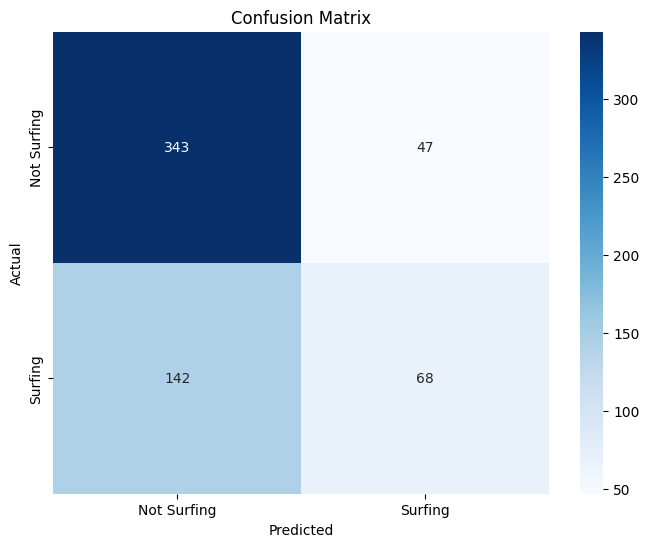


Most Predictive Variables:


,Variable,Coefficient
0,weekend,0.922171
3,good_weather,0.727058
2,popular_location,0.569419
5,morning_time,0.499743
4,summer,0.386443
7,close_drive,0.340647
1,small_waves,0.099815
6,wetsuit_needed,-0.063162


In [ ]:
# A logistic regression with a 80/20 split for training and testing. The target variable is 'go_surfing' and the predictor variables are weekend, small_waves, popular_location, good_weather, summer, morning_time, wetsuit_needed, close_drive. Create a summary table of the logistic regressions output. Create a table of the evaluation with precision, recall, and f1 scores. Create a confusion matrix chart with labels. Indicate the most predictive variables.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded from the previous code block

# Define predictor and target variables
X = df[['weekend', 'small_waves', 'popular_location', 'good_weather', 'summer', 'morning_time', 'wetsuit_needed', 'close_drive']]
y = df['go_surfing']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model using statsmodels for summary table
X_train_sm = sm.add_constant(X_train) # Adding a constant for the intercept
model = sm.Logit(y_train, X_train_sm).fit()
print(model.summary())

# Fit logistic regression model using scikit-learn for predictions
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Surfing', 'Surfing'],
            yticklabels=['Not Surfing', 'Surfing'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Most predictive variables (based on coefficients)
coefficients = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': clf.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', key=abs, ascending=False)
print("\nMost Predictive Variables:")
coefficients


              precision    recall  f1-score   support

           0       0.69      0.92      0.79       390
           1       0.62      0.25      0.35       210

    accuracy                           0.68       600
   macro avg       0.66      0.58      0.57       600
weighted avg       0.67      0.68      0.64       600

Precision: 0.6190476190476191
Recall: 0.24761904761904763
F1 Score: 0.35374149659863946

Feature Importance:
            Feature  Importance
0           weekend    0.494749
3      good_weather    0.306552
2  popular_location    0.103085
5      morning_time    0.095614
1       small_waves    0.000000
4            summer    0.000000
6    wetsuit_needed    0.000000
7       close_drive    0.000000


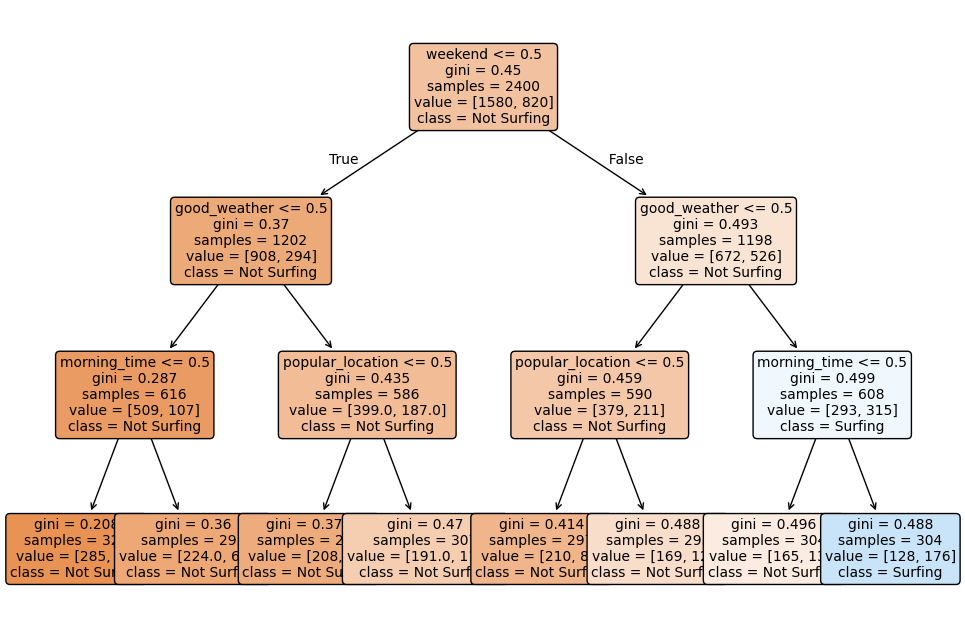

In [ ]:
# prompt: run a classification decision tree. The target variable is 'go_surfing' and the predictor variables are weekend, small_waves, popular_location, good_weather, summer, morning_time, wetsuit_needed, close_drive. Create a summary table of the decision tree output. Include a graph of the tree at 3 levels. Create a table of the evaluation with precision, recall, and f1 scores. Indicate the most predictive variables.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming df is already loaded from the previous code block

# Define predictor and target variables
X = df[['weekend', 'small_waves', 'popular_location', 'good_weather', 'summer', 'morning_time', 'wetsuit_needed', 'close_drive']]
y = df['go_surfing']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42) # Limiting depth for visualization
clf = clf.fit(X_train,y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


# Create a summary table
summary_table = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
summary_table = summary_table.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(summary_table)

# Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Not Surfing', 'Surfing'], filled=True, rounded=True, fontsize=10)
plt.show()




In [ ]:
# prompt: run an SVM. The target variable is 'go_surfing' and the predictor variables are weekend, small_waves, popular_location, good_weather, summer, morning_time, wetsuit_needed, close_drive. Slit the data as 80/20 for training and testing. Create a summary table of the SVM output. Include a graph of the SVM. Create a table of the evaluation able of the model. Indicate the most predictive variables.

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is already loaded and preprocessed

# Define predictor and target variables
X = df[['weekend', 'small_waves', 'popular_location', 'good_weather', 'summer', 'morning_time', 'wetsuit_needed', 'close_drive']]
y = df['go_surfing']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42) # You can change the kernel if needed
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


# Coefficients for linear SVM (if using linear kernel)
if hasattr(svm_classifier, 'coef_'):
  coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': svm_classifier.coef_[0]})
  coefficients = coefficients.sort_values(by='Coefficient', key=abs, ascending=False)
  print("\nMost Predictive Variables (based on coefficients):")
  print(coefficients)
else:
  print("Coefficients are not available for this kernel.")



              precision    recall  f1-score   support

           0       0.65      1.00      0.79       390
           1       0.00      0.00      0.00       210

    accuracy                           0.65       600
   macro avg       0.33      0.50      0.39       600
weighted avg       0.42      0.65      0.51       600


Most Predictive Variables (based on coefficients):
           Variable  Coefficient
7       close_drive     0.000257
3      good_weather     0.000253
0           weekend     0.000241
5      morning_time     0.000201
6    wetsuit_needed     0.000114
1       small_waves    -0.000104
2  popular_location     0.000088
4            summer     0.000066


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
